# Практика по спектроскопии 

## Введение

На этой практике вам предстоит детектировать разные газы в атмосфере Марса. Спектроскопия - один из стандартных для этого методов. Достоинство спектроскопии заключается в том, что оно позволяет дистанционно измерять присутствие и характеристики разных газов в атмосфере Марса. Часто, это помимо использование методов спектроскопии, требует [сложных методов обработки данных](https://ru.wikipedia.org/wiki/%D0%9E%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%B0%D1%8F_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0). Мы же будем использовать более простую форулировку задачи для *[in situ](https://en.wikipedia.org/wiki/In_situ)* экспериментов, таких как роверы. В таких случаях часто используют специальное хранилище газа &mdash; кювету &mdash; нагнетают туда газ из атмосферы под большим давлением и измереяют его спектр поглощения. 
\
\
Схема нашего эксперимента выглядит так: 
![Схема](scheme.png)

Свет проходит через кювету с газом с зеркалами с очень высоким коэффициентом отражения. Таким образом можно очень сильно увеличить оптичиеский путь света, а значит и поглощение. Другой способ увеличить поглощение - увеличить давление газа. В нашем случае газ из марсианской атмосферы нагнетается до давления в 0.5 бар (атмосферы). Эта схема очень похожа на прибор [TLS](https://doi.org/10.1007/s11214-012-9879-z).
\
\
С точки зрения математики выглядит это так:
$$
\Large  I = I_0T
$$
Где $I$ это измерения в интенсивности, а $I_0$ это источник света. $T=e^{-\tau}$ это пропускание света. Наши данные будут именно пропусканием, а не интенсивностью. Оно рассчитывается по [формуле Бугера-Лаберта-Бера](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%91%D1%83%D0%B3%D0%B5%D1%80%D0%B0_%E2%80%94_%D0%9B%D0%B0%D0%BC%D0%B1%D0%B5%D1%80%D1%82%D0%B0_%E2%80%94_%D0%91%D0%B5%D1%80%D0%B0): 
$$
\Large\ T = e^{-k n l}
$$
Где $T$ &mdash; пропускание газа, то есть доля света, проходящего через среду. Значения пропускания **1** означает что свет на этой длине волны проходит полностью и не поглощается молекулами газа. Значение **0** означает что весь свет поглотился газом, и не прошло ни одного фотона света. $l$ &mdash; оптический путь, который проходит свет сквозь среду, в нашем случае свет много раз отражается в зеркалах в кювете, и проходит гораздо больший путь чем длина кюветы. $n$ &mdash; относительное содержание газа (в долях от единицы), а $k$ &mdash; коэффициент поглощения. Коэффициент поглощения это величина, которая пропорциональна поглощению молекулами газа, и зависит от температуры, давления и других параметров вещества. **В вашем распряжении будут данные, которые очень близки к реальным спектрам с Марса и сечения поглощения каждого газа и вам нужно будет подобрать концетрацию так, чтобы она описывала этот спектр.**
\
\
Как и на всех других практиках, вокруг вас находятся волонтеры и люди готовые ответить на любой ваш вопрос. **Пожалуйста, не стесняйтесь спрашивать их вопросы по заданию!**

## Часть первая: спектр около места посадки Mars2020
### Загрузка данных

Мы сгенерировали для вас спектры, которые могли бы быть измерены в районе посадки трех марсоходов: _Сuriosity_, _Mars 2020_ (_Perseverance_) и _Zhurong_. Далее, мы попробуем выяснить сколько в каждом из спектров различных газов.


Для загрузки данных используем пакет `numpy`.

In [2]:
import numpy as np

Давайте попробуем загрузить данные для вашего первого задания. Мы используем функцию `loadtxt` из пакета `numpy`. В качестве первого аргумента нужно поставить имя файла вместе с путем к нему (например: `data/filename.txt`). Для загрузки столбцов данных в раздельные переменные будем использовать аргумент `unpack=True`. 

In [3]:
wavelength, t = np.loadtxt('data/Mars2020/spectrum.txt', unpack=True, encoding="utf8") # впишите нужное имя файла
                                                             # здесь и далее весь текст после символа # означает комментарий
                                                             # и интерператор не обращает на него внимания

Файл, из которого мы работаем находится в директории `astrophysics/spectroscopy`, и в этой же директории есть папка `data`, а в ней `Mars2020`. \
\
*Примечение: Такое указание пути называется относительным, потому что оно происходит относительно файла откуда мы запускаем код. Дальше вам нужно будет самим загружать данные и указывать пути до них!*

Для вывода данных используем пакет `matplotlib.pyplot`.

In [4]:
import matplotlib.pyplot as plt

Теперь построим график. Напоминаем, что функция `plot` работает так: вы ее вызываете, и указываете в скобках два значения через запятую, первое значание это данные по оси x, а второе - по оси y:

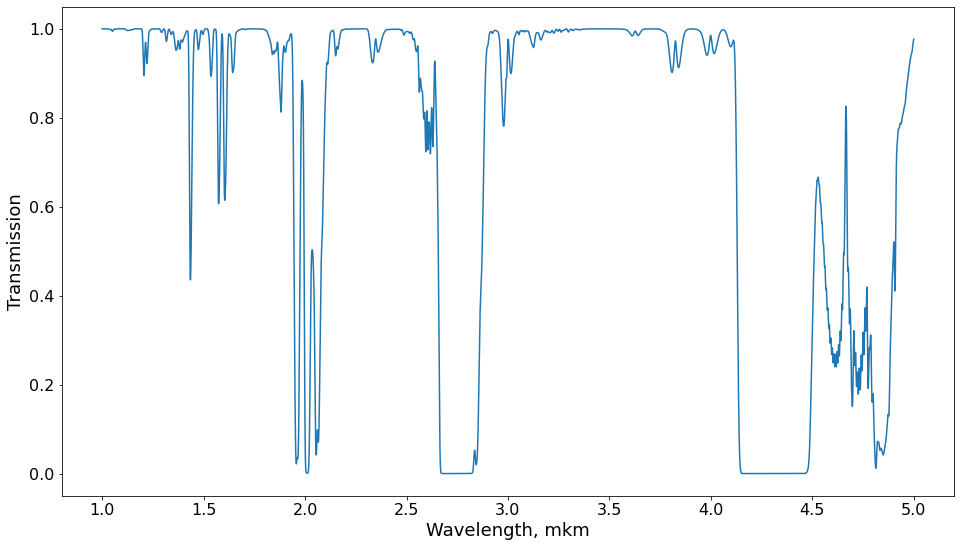

In [5]:
plt.figure(figsize=(16,9), facecolor='white')
plt.plot(wavelength, t) # впишите нужные "x" и "y" в аргументы функции
 # figsize  регулирует размер картинки, а facecolor - цвет фона

plt.xlabel('Wavelength, mkm', fontsize=18)   # впишите правильную подпись оси x согласно содержанию текстового файла 
                                  # и выберите подходящий размер шрифта fontsize
plt.ylabel('Transmission', fontsize=18)   # впишите правильную подпись оси y согласно содержанию текстового файла 
                                  # и выберите подходящий размер шрифта fontsize
plt.gca().tick_params(labelsize=16)

Когда вы рисуете графики очень важно указывать что отображено по осям, давайте подпишем. Вы можете посмотреть описание данных открыв файл в блокноте. Впишите в кавычках что указано по оси x и что указано по оси y:

### Моделирование пропускания
Теперь попробуем это промоделировать. Для этого будем использовать функцию из `lksh`:

In [6]:
from lksh import beerlambert

Для рассчета пропускания нам нужны коэффициенты поглощения. Мы подготовили для вас сечения поглощения разных газов. Давайте загрузим, например, CO$_2$:

In [7]:
k_co2 = np.loadtxt('data/Mars2020/absorption-coefficients/co2.txt', encoding="utf8") 

Функция `beerlambert` имеет 5 аргументов:
\
`beerlambert(wavelength, k, n, l, r)`:
\
`wavelength` - это длины волн которые мы загрузили в предыдущих ячейках, `k` &mdash; коэффициенты поглощения CO$_2$ который мы тоже загрузили до этого, `n = 0.96` &mdash; доля содержания CO$_2$ в атмосфере Марса (она состоит из 96% CO$_2$),  `l=100` это оптический путь в метрах, все как в формуле Бугера-Ламберта-Бера, `r=1000` спектральное разрешение прибора. `r` указывать не обязательно, если дать функции 4 аргумента, если не указать ничего, то `r` будет равно `1000`, это значение по умолчанию.
- Используйте функцию `beerlambert` и подставьте туда правильные аргументы


In [8]:
n = 0.96

In [9]:
wv_co2, t_co2 = beerlambert(k_co2[:,0], k_co2[:,1], n, l=100) # обратите внимание что wv_co2 не равно wavelength
                                                     # который вы загружали раннее

- Выведите результат, используя `plt.plot` (не забудьте подписать оси и графики) Сравните этот спектр с загруженным ранее спектром, измеренного рядом с местом посадки Mars2020.

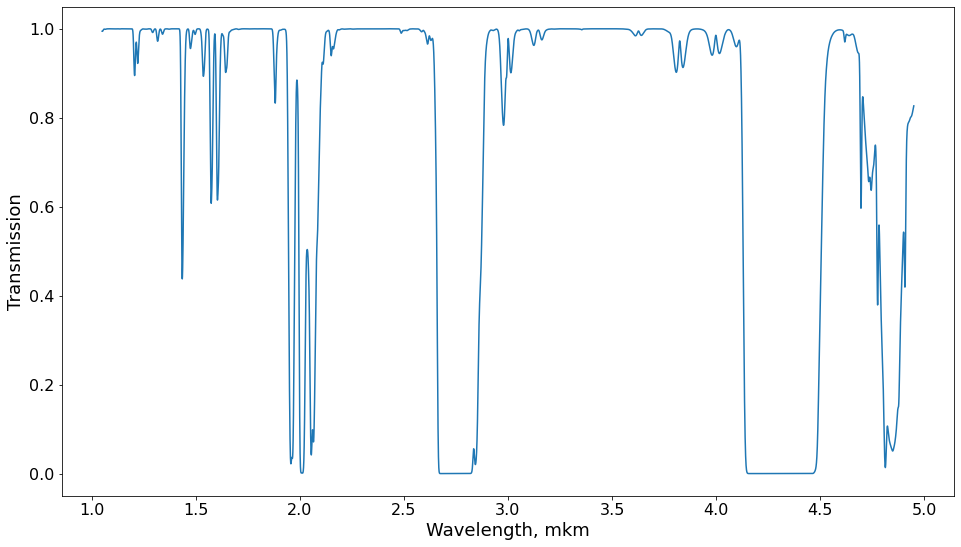

In [10]:
plt.figure(figsize=(16,9))
plt.xlabel('Wavelength, mkm', fontsize=18)
plt.ylabel('Transmission', fontsize=18)
plt.gca().tick_params(labelsize=16)
plt.plot(wv_co2, t_co2)
# plt.plot(wavelength, t)
plt.show()

### Работа со спектром
Теперь попробуем получить пропускания для разных газов. Повторите процесс, описанный в предыдущем пункте для H$_2$O и CO выбрав соответствующие файлы из директорий для коэффициентов поглощения `k` и правильную долю содержания `n`.

In [11]:
k_co = np.loadtxt('data/Mars2020/absorption-coefficients/co.txt', encoding="utf8") 
k_h2o = np.loadtxt('data/Mars2020/absorption-coefficients/h2o.txt', encoding="utf8") 

Теперь необходимо построить совместные графики пропусканий атмосферы и отделных газов. Данные пропускания атмосферы были получены в 1 пункте, при чтении `wavelength` и `t`. Воспользуемся ими ещё раз.
\
\
Чтобы построить несколько графиков на одном изображении вызовите команду `plt.plot` несколько раз. Подставьте в `t_1` и `t_2` нужные пропускания и подпишите построенные графики. `plt.legend` позволяет вывести подписи к графикам.

In [12]:
wv_co, t_co =  beerlambert(k_co[:,0], k_co[:,1], n=0.0007, l=100)
wv_h2o, t_h2o = beerlambert(k_h2o[:,0], k_h2o[:,1], n=0.00011, l=100)

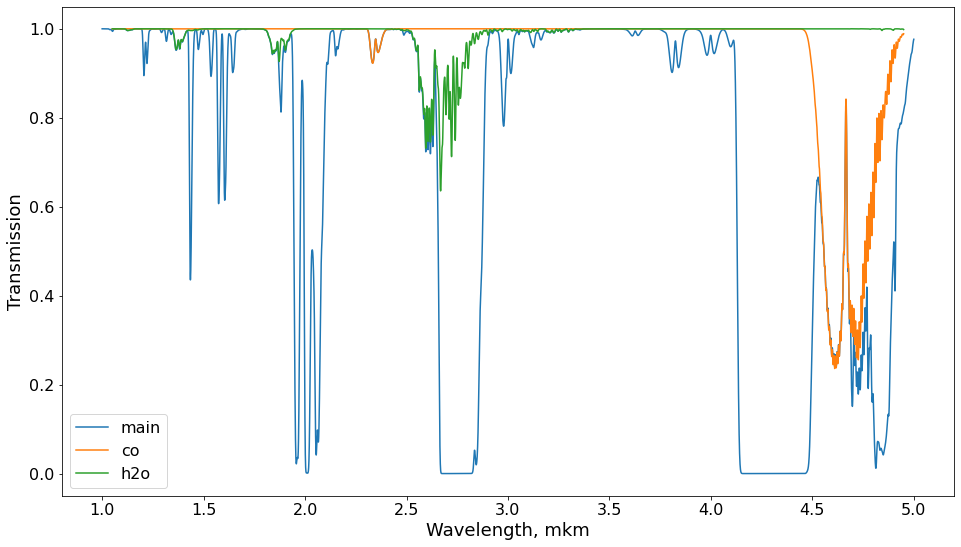

In [13]:
plt.figure(figsize=(16,9))
plt.xlabel('Wavelength, mkm', fontsize=18)
plt.ylabel('Transmission', fontsize=18)
plt.gca().tick_params(labelsize=16)
plt.plot(wavelength, t, label='main') 
plt.plot(wv_co, t_co, label='co') 
plt.plot(wv_h2o, t_h2o, label='h2o') 
plt.legend(fontsize=16)
plt.show()

- Хорошо ли совпадают графики? 
- Подберите значения концентраций `CO2`, `H2O` и `CO` в данных так, чтобы они совпадали с данными\

CO2 - 96%
CO - 0.07%
H2O - 0.011%

## Часть вторая: место посадки Curiosity

Ровер Curiosity находится в кратере Гейла на Марса. Несколько раз он детектировал метан с помощью прибора TLS. Эти и другие детектирование находятся на пределе возможностей прибора, и не подтверждены более мощными приборами, которые измеряют метан в средней и верхней атмосфере. Одна из гипотез заключается в том, что источник метана находится где-то около поверхности, а его появление носит сезонный характер. Представим себе, что наш прибор измеряет именно в момент хорошего содержания метана.
- Загрузите данные из файла `data/Curiosity/spectrum.txt`

In [14]:
cu_wavelength, cu_t = np.loadtxt('data/Curiosity/spectrum.txt', unpack=True, encoding="utf8")

Возможно, вам будет удобнее выделить полосу поглощения метана на графике и работать только с ней. Для этого можно ограничивать рамки графика по осям x и y коммандами `plt.xlim([xmin, xmax])` и `plt.ylim([ymin, ymax])`, где min и max - нужные значения. Это нужно для подробного расмотрения узких интервалов и детального рассмотрения полос спектра.
\
\
Попробуйте вывести данные в узком диапазоне длин волн (ось x). 

In [36]:
k_ch4 = np.loadtxt('data/Curiosity/absorption-coefficients/CH4.txt', encoding="utf8") 

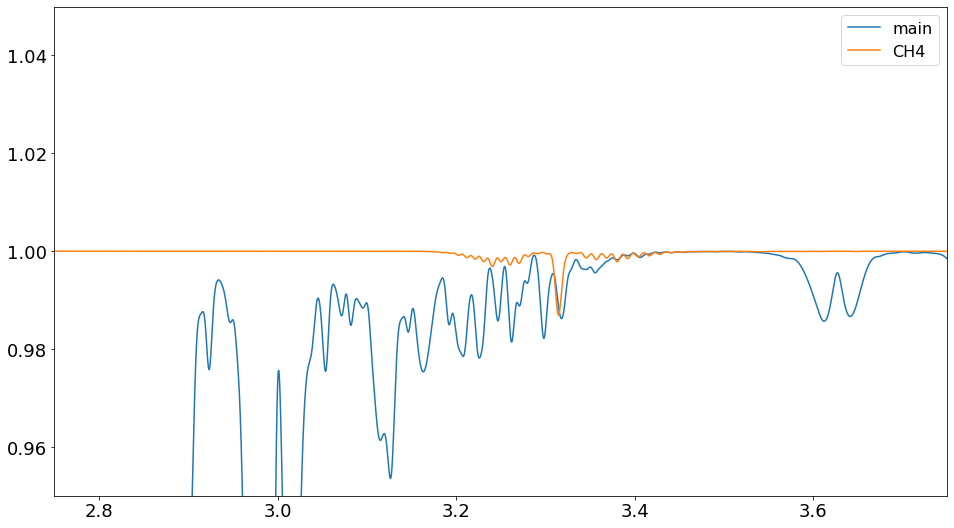

In [37]:
wv_ch4, t_ch4 = beerlambert(k_ch4[:,0], k_ch4[:,1], n=0.0000002, l=100)
plt.plot(cu_wavelength, cu_t, label='main') 
plt.plot(wv_ch4, t_ch4, label='CH4') 
plt.xlim([2.75, 3.75])
plt.ylim([0.95, 1.05])
plt.legend(fontsize=16)
plt.show()

- Попробуйте найти метан и определить его концетрацию в данных с места посадка Curiosity. Для моделирование используйте коэффициенты поглощения уже из директории `data/Curiosity/absorption-coefficients` &mdash; для каждой локации немного отличается температура и давление, что влияет на спектры

- (* здесь и далее звездочка означает необязательное задание) Попробуйте найти концетрации других малых газов в этом и предыдущем спектрах

In [38]:
k_hcl = np.loadtxt('data/Curiosity/absorption-coefficients/HCl.txt', encoding="utf8") 

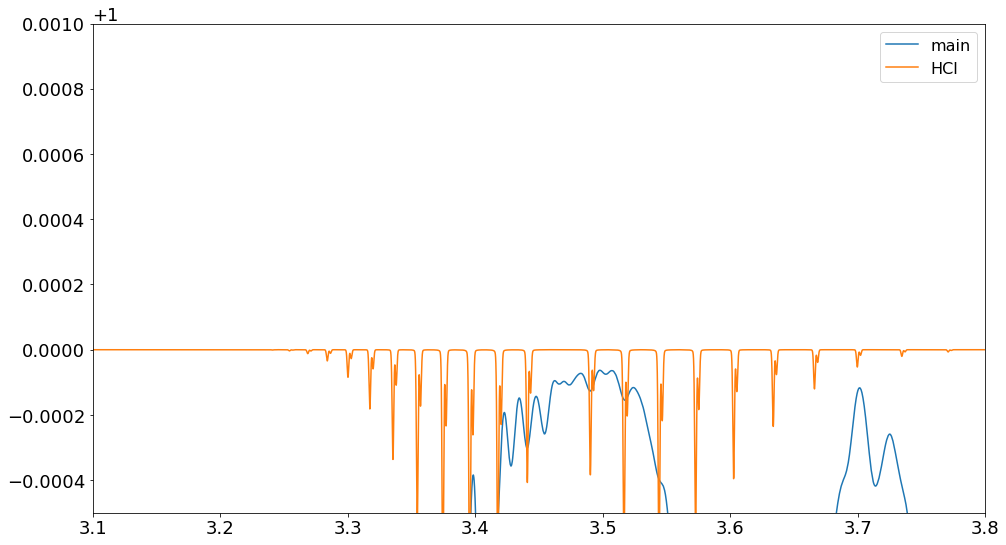

In [39]:
wv_hcl, t_hcl = beerlambert(k_hcl[:,0], k_hcl[:,1], n=0.000000013, l=100, r=5000)
plt.plot(cu_wavelength, cu_t, label='main') 
plt.plot(wv_hcl, t_hcl, label='HCl') 
plt.xlim([3.1, 3.8])
plt.ylim([0.9995, 1.001])
plt.legend(fontsize=16)
plt.show()

(*) _Примечение: если перемножить модельные спектры получится не спектр газа который состоит из двух этих компонентов. Это связано с тем, что для простоты свертка зашита в `beerlambert`. Если хотите точное воспроизведение экспериментальных данных, вызовите `beerlambert` с аргументом `r=None`, перемножьте пропускание интересующих вас газов, а потом сверните результат умножения с помощью функции convolve из модуля `lksh`_

## Часть третья: место посадки Zhurong и спектры высокого разрешения

До этого мы использовали данные низкого разрешения. Такие данные более наглядные, однако можно детектировать гораздо более малые доли компонентов работая с более высоким разрешением. 
- Попробуйте поменять значение параметра `r`, который отвечает за разрешение спектрометра. Попробуйте значения `r` в `1000` (стандартное), `5000`, `10000` и `20000`.

In [40]:
zh_wavelength, zh_t = np.loadtxt('data/Zhurong/spectrum.txt', unpack=True, encoding="utf8")

In [41]:
k_co2 = np.loadtxt('data/Zhurong/absorption-coefficients/CO2.txt', encoding="utf8") 

Теперь попробуем поработать со спектром высокого разрешения и восстановим значение водяного пара (`H2O`) из данных.
H2O - 0.05%
- Определите концетрацию водяного пара из данных в файле `data/Zhurong/spectrum.txt`. В этих данных `r=10000`

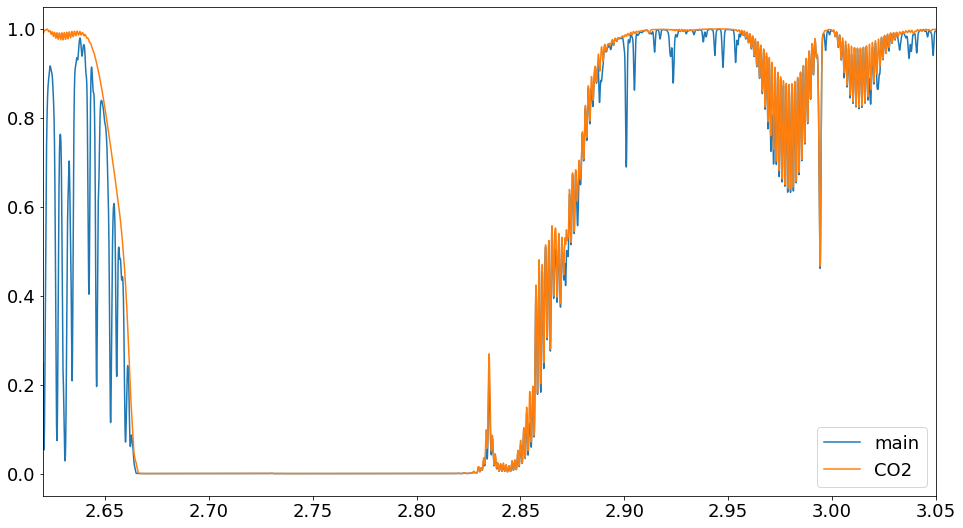

In [42]:
wv_co2, t_co2 = beerlambert(k_co2[:,0], k_co2[:,1], n=0.95, l=100, r=10000)
plt.plot(zh_wavelength, zh_t, label='main') 
plt.plot(wv_co2, t_co2, label='CO2') 
plt.xlim([2.62, 3.05])
#plt.ylim([0.1, 1.05])
plt.legend()
plt.show()

- (*) Попробуйте найти концетрации других малых газов в этом спектре

## (\*) Часть четвертая: настоящая наука

Если вы чувствуете себя уверенно и хотите попробовать экспириенс максимально близкий к научному, то попробуйте оптимизировать и автоматизировать процесс. Обратите внимание, что это **гораздо** более сложная задача, чем все предыдущие, но зато она вам даст отличный опыт работ с оптимизацией. 
\
\
Как автоматизировать процесс поиска в данных опредленных газов? Нужно минимизировать разницу между моделью и данными! Сначала нужно найти разницу между модельными данными и экспериментальными. Вообще говоря, это не так просто: модельные данные и экспериментальные данные опредлены у нас на разных сетках. Вам нужно проинтерполировать экспериментальные данные на сетку модельных данных. Лучше всего использовать для этого функцию [interp1d из scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html). На русском есть гайд вот [здесь](https://github.com/teimy/iki-course/blob/master/Lection3.ipynb), но лучше посмотрите в гугле на английском.

Отлично, теперь нам нужно минимизировать разницу. Этот процес называется оптимизация, и это очень большой и сложный раздел математики и программирования. Вот [здесь же](https://github.com/teimy/iki-course/blob/master/Lection3.ipynb), в главе `Аппроксимация` есть подробное описание и короткий гайд к использованию функции [`curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). Вам нужно грубо говоря сделать то же самое, только вместо `func(x, a, b, c)` у нас `beerlambert`.
\
\
Совет: сначала попробуйте сделать пример из курса по ссылке, потом пробуйте здесь. Между примером по ссылке и нашим примером есть одна огромная разница: там функция считается всего пару микросекунд, а у нас, из-за вшитой свертки, она считается очень долго. У этой проблемы есть глобально два решения: простое заключается в обрезании данных маской по длиннам волн до узкого окна, а значит сокращения времени работы функции `beerlambert` на порядок. Сложное заключается в генерации сетки данных с разной концентрации n, а потом двумерную интреполяцию в диапзоне длин волн и концентраций. Это решение гораздо более быстрое и правильное, но надо написать много сложного кода.
\
\
Если у вас получится реализовать до конца Летней Космической Школы 2022 любое из этих решений &mdash; присылайте его на почту `aleksander.lomakin96@gmail.com` - с меня сувенир :)

In [43]:
from scipy.optimize import curve_fit

In [47]:
wavelength, t = np.loadtxt('data/Zhurong/spectrum.txt', unpack=True, encoding="utf8")
k_co2 = np.loadtxt('data/Zhurong/absorption-coefficients/CO2.txt', encoding="utf8")

In [48]:
#калькулируем transmission по коэффициентам поглощения через beerlambert
wv_co2, t_co2 = beerlambert(k_co2[:,0], k_co2[:,1], n=0.93, l=100, r=10000)
#концентрацию придумываем любую, l фиксированно 100, рахрешение r в этих данных 10000

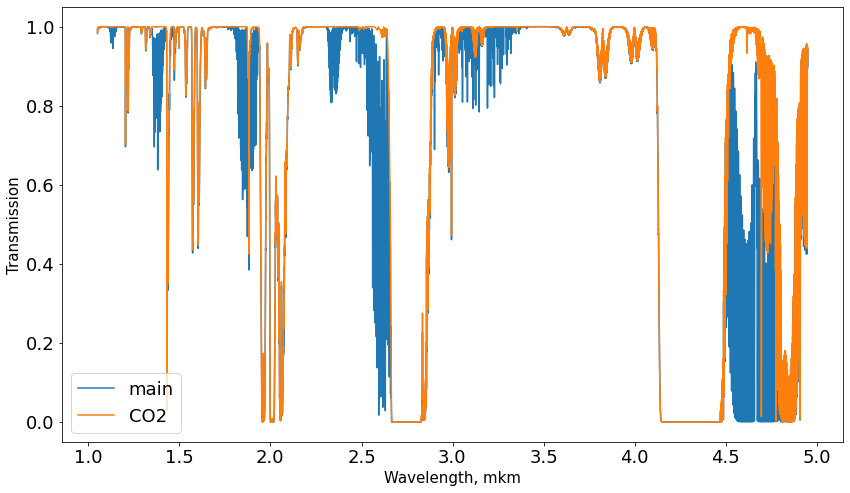

In [49]:
#строим графичек, чтобы примерно понять как это всё выглядит

fig = plt.figure(figsize=(14,8))
plt.plot(wavelength, t, label='main') 
plt.plot(wv_co2, t_co2, label='CO2')
plt.xlabel('Wavelength, mkm', fontsize=15)
plt.ylabel('Transmission', fontsize=15)
plt.legend()
plt.show()

Main wv:  (20000,)
CO2:  (20000,)
Function len:  (10000,)


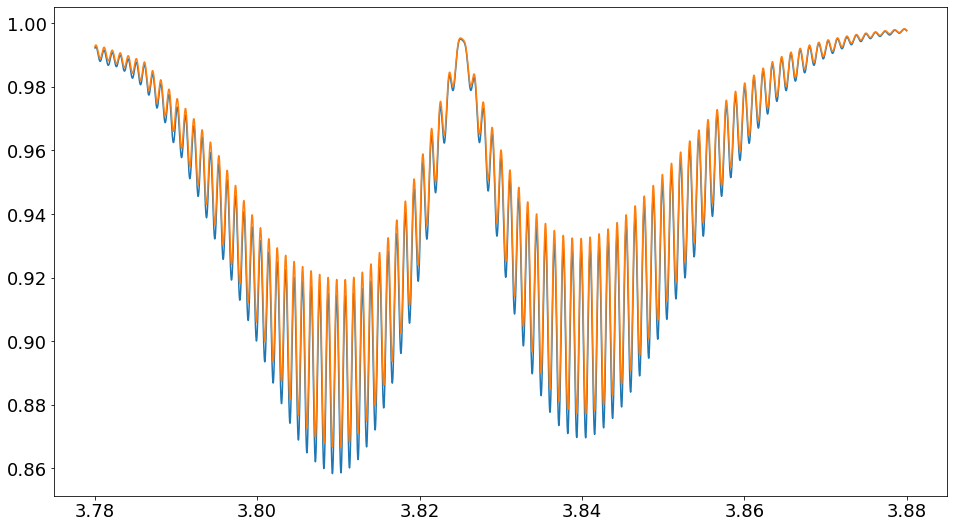

In [50]:
qu1 = 3.73
qu2 = 3.93
mask = (wavelength > qu1) & (wavelength < qu2) # задаём диапазон без лишних некрасивых кусочков
mask_co2 = (wv_co2 > qu1) & (wv_co2 < qu2)
coef_co2 = k_co2[:, 1][5000:-5000]

print('Main wv: ', wavelength[mask].shape) # проверяем что два списка получились одинаковой длины
print('CO2: ', coef_co2[mask_co2].shape)

def the_function(xdata, n): # т. н. обёрточная функция
    return beerlambert(xdata, coef_co2[mask_co2], n=n, l=100, r=10000)[1]
print('Function len: ', the_function(wv_co2, 0.9).shape)

plt.plot(wavelength[mask][5000:-5000], t[mask][5000:-5000]) # длина списка функции меньше первых двух листов на 10000
plt.plot(wv_co2[mask_co2][5000:-5000], the_function(wv_co2, 0.9))
plt.show()

In [51]:
param, smth = curve_fit(the_function, wv_co2[mask_co2][5000:-5000], t[mask][5000:-5000], p0=0.95, bounds=[0, 1])
param # это значение концентрации, подобранное нам curve_fit-ом

array([0.97300892])

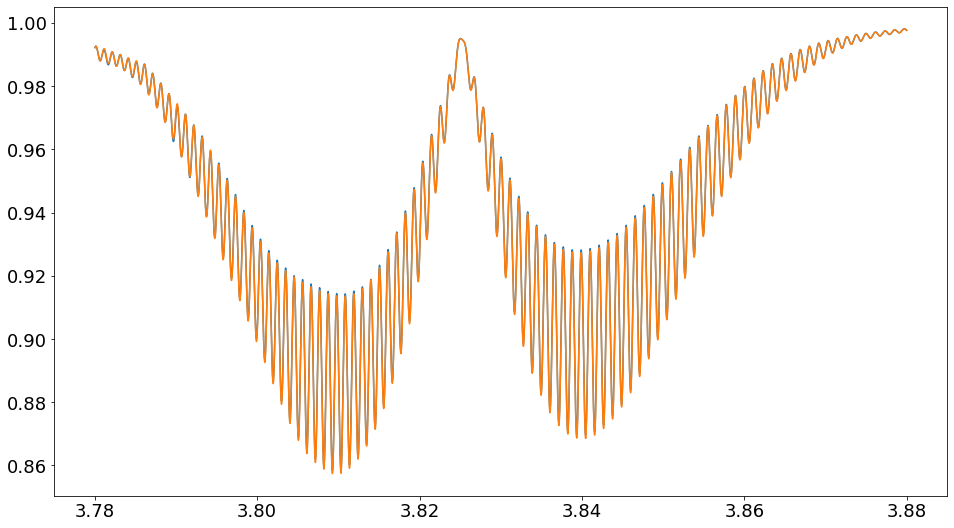

In [52]:
# проверим его на графике
plt.plot(wavelength[mask][5000:-5000], t[mask][5000:-5000])
plt.plot(wv_co2[mask_co2][5000:-5000], the_function(wv_co2, param))

In [53]:
qu1_list = [1.15, 1.26, 1.47, 1.888, 3.73, 3.89, 4.415] # хорошие промежуточки
qu2_list = [1.28, 1.3751, 1.68, 2.174, 3.93, 4.1, 4.537]
n_list = [] # сюда будем записывать концентрации

In [54]:
for i in range(len(qu1_list)):
    qu1 = qu1_list[i]
    qu2 = qu2_list[i]
    mask = (wavelength > qu1) & (wavelength < qu2)
    mask_co2 = (wv_co2 > qu1) & (wv_co2 < qu2)
    coef_co2 = k_co2[:, 1][5000:-5000]
    def the_function(xdata, n):
        return beerlambert(xdata, coef_co2[mask_co2], n=n, l=100, r=10000)[1]
    param, smth = curve_fit(the_function, wv_co2[mask_co2][5000:-5000], t[mask][5000:-5000], p0=0.95, bounds=[0, 1])
    n_list.append(param[0])
np.mean(n_list) # опытным путём выяснилось, что при хорошем подборе промежутков, среднее арифметическое достаточно близкая
                # к правде цифра

0.9566658895273872

In [55]:
# если брать весь промежуток, то получается не такое крутое значение. Average гораздо ближе к реальности:
qu1 = 1
qu2 = 6
mask = (wavelength > qu1) & (wavelength < qu2)
mask_co2 = (wv_co2 > qu1) & (wv_co2 < qu2)
coef_co2 = k_co2[:, 1][5000:-5000]

def the_function(xdata, n):
    return beerlambert(xdata, coef_co2[mask_co2], n=n, l=100, r=10000)[1]

param, smth = curve_fit(the_function, wv_co2[mask_co2][5000:-5000], t[mask][5000:-5000], p0=0.95, bounds=[min(n_list), max(n_list)])
param[0]

0.9770545648586594

## H2O

In [56]:
k_h2o = np.loadtxt('data/Zhurong/absorption-coefficients/H2O.txt', encoding="utf8")

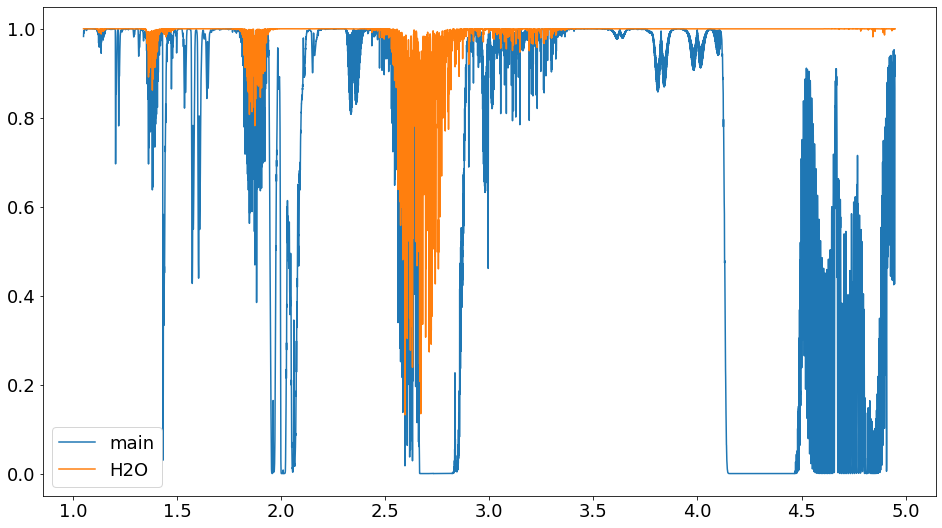

In [57]:
wv_h2o, t_h2o = beerlambert(k_h2o[:,0], k_h2o[:,1], n=0.0001, l=100, r=10000)
fig = plt.figure(figsize=(16,9))
plt.plot(wavelength, t, label='main') 
plt.plot(wv_h2o, t_h2o, label='H2O')
#plt.xlim([1.24, 1.3])
plt.legend()
plt.show()

In [58]:
n_list_h2o = []

H2O:  (15001,)
Func len:  (5001,)


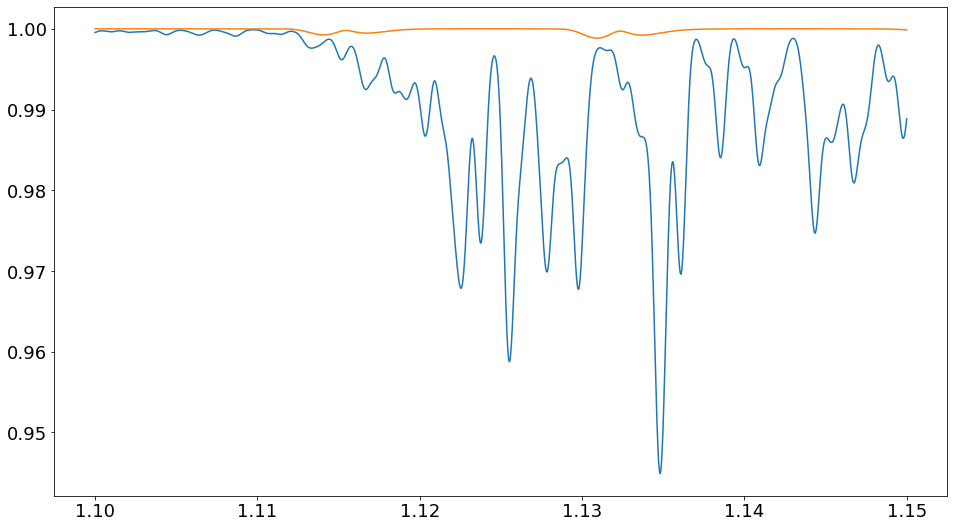

In [59]:
qu1_h2o = 1
qu2_h2o = 1.2

mask_h2o = (wv_h2o > qu1_h2o) & (wv_h2o < qu2_h2o)
coef_h2o = k_h2o[:, 1][5000:-5000]
print('H2O: ', coef_h2o[mask_h2o].shape)

def func2(wavelength, n_h2o):
    wv1, t1 = beerlambert(wavelength, coef_co2[mask_h2o], n=np.mean(n_list), l=100, r=10000)
    wv2, t2 = beerlambert (wavelength, coef_h2o[mask_h2o], n=n_h2o, l=100, r=10000)
    return t1, t2
print('Func len: ', func2(wv_co2, 0.0001)[0].shape)

fig = plt.figure(figsize=(16,9))
plt.plot(wavelength[mask_h2o][5000:-5000], t[mask_h2o][5000:-5000])
plt.plot(wv_h2o[mask_h2o][5000:-5000], func2(wv_h2o, 0.0005)[0])